# When QueryFlow won't help
    

In [6]:
from plotly.offline import iplot, init_notebook_mode
import numpy as np

# The following lines only needed for rendering in github
# and require conda install -c plotly plotly-orca psutil
import plotly.io as pio
pio.renderers.default = "png"

**The first limitation is QueryFlow reliance in logical execution plan or the actual execution statistics**. Database or data-engines that don’t provide those currently cannot be supported. In addition, in cases where the root cause can’t be identified using any of the statistics from the execution plan, QueryFlow won’t be able to help either.


**The second limitation of QueryFlow is layout of skewed data**.Since Sankey-diagram visualizes the edge of a sub-expression proportionally to a measurable metric, in cases with very skewed values, some of the insights that are inferred may be less visible. For example, in the next figure we see the edge value between the “Team A” node to the “Sold” node is 9 times bigger than the edge value between the “Team A” node to the “Not Sold” but since the other relations are much smaller, it skews the visualization.



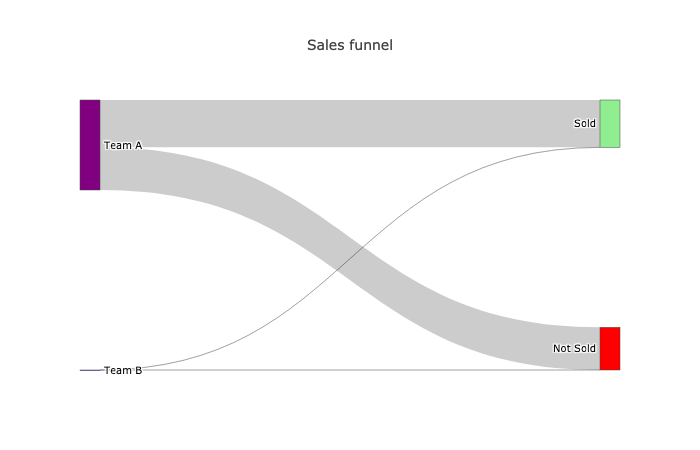

In [7]:
color  = ['purple', 'blue', 'LightGreen', 'red']
label  = ["Team A", "Team B", "Sold", "Not Sold"]
source = [0, 0, 1, 1]
target = [2, 3, 2, 3]
value  = [1000000000000000, 900000000000000, 1, 10]

data_trace = dict(type="sankey",
                  orientation="h",
                  hoverinfo="all",
                  valueformat=",",
                  node=dict(pad=200, label=label, color=color),
                  link=dict(source=source, target=target, value=value))

layout = dict(title="Sales funnel", font=dict(size=10), height=750)
iplot(dict(data=[data_trace], layout=layout), validate=False)

To mitigate it, we can represent the same metric using percentage; this reduces the skewness, and the visualization looks closer to reality as can be seen in the next cell.

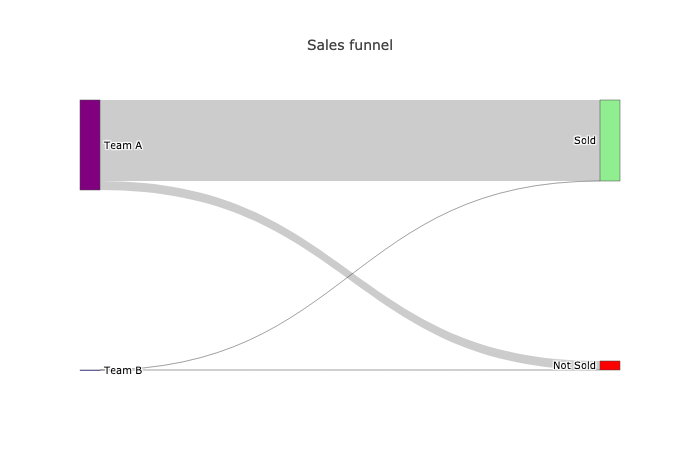

In [8]:
color  = ['purple', 'blue', 'LightGreen', 'red']
label  = ["Team A", "Team B", "Sold", "Not Sold"]
source = [0, 0, 1, 1]
target = [2, 3, 2, 3]
value  = [90, 10, 0.001, 0.01]

data_trace = dict(type="sankey",
                  orientation="h",
                  hoverinfo="all",
                  valueformat=",",
                  node=dict(pad=200, label=label, color=color),
                  link=dict(source=source, target=target, value=value))

layout = dict(title="Sales funnel", font=dict(size=10), height=750)
iplot(dict(data=[data_trace], layout=layout), validate=False)

**The last limitation of QueryFlow is that QueryFlow can be overwhelming in extreme cases** as can be seen in the next figure. 
 

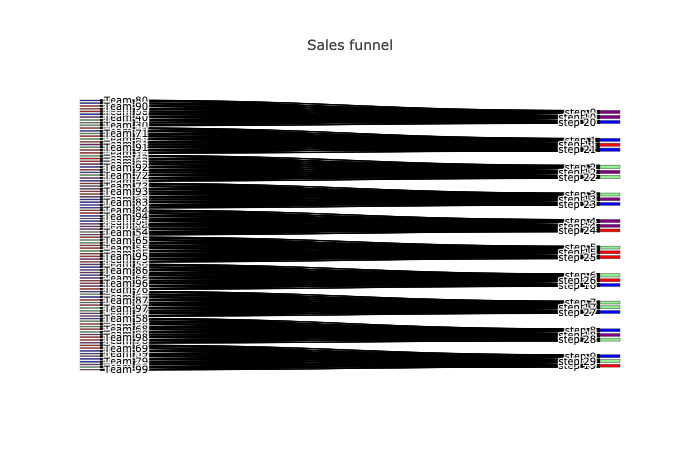

In [9]:
steps = [f"step {i}" for i in range(30)]
label  = [f"Team {i}" for i in range(100)]
source = list(range(len(label))) * len(steps)
label.extend(steps) 
target = list(range(len(label)-len(steps), len(label))) * (len(label))
value  = np.random.randint(1000, size=len(target))
color = np.random.choice(['purple', 'blue', 'LightGreen', 'red'] , len(target))

data_trace = dict(type="sankey",
                  orientation="h",
                  hoverinfo="all",
                  valueformat=",",
                  node=dict(pad=200, label=label, color=color),
                  link=dict(source=source, target=target, value=value))

layout = dict(title="Sales funnel", font=dict(size=10), height=750)
iplot(dict(data=[data_trace], layout=layout), validate=False)

This can be mitigated by filtering and visualizing only promising candidates